# Ising Model
## Mean-Field Theory

Hamiltonian:
$ H[\{\sigma_i\}] = -J \sum_{\langle i,j\rangle} \sigma_i \sigma_j -B\sum_{i=1}^N \sigma_i $.

Mean-Field Hamiltonian:
$ H[\{\sigma_i\}] = -(Jqm+B) \sum_{i=1}^N \sigma_i + NJqm^2/2$.

Partition function:
$ Z(T,B)=exp(-\beta NJqm^2/2)(2 \cosh(\beta Jqm + \beta B)))^N $.

Free energy per spin:
$ f(T,B)=Jqm/2 -k_B T \ln(2 \cosh(\beta Jqm + \beta B)) $.

Self-consistent equation for the magnization:
$ m(T,H)=\tanh(\beta Jqm(T,H) + \beta B)$.

Critical temperature:
$ k_B T_c = Jq$

Susceptibility per spin in zero external field:
$$
  \chi(T,B) = \frac{1}{k_B} \frac{1}{T \cosh(\frac{T_c}{T}m)^2-Tc}
$$

### fix me

Magnetization per spin:
$ m(T,B)= \tanh(\beta B) $.

Energy per spin:
$\epsilon(T,B)=-B\tanh(\beta B)$.

Specific heat:
$c(T,B)=\frac{B^2}{k_B T^2} (\text{sech}(\beta B))^2$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
J = 1.0
kB = 1.0
q = 4
Tc = J*q/kB

In [3]:
def f(m, T, B, q):
    beta = 1/(kB*T)
    return J*q*m*m/2 - (kB*T)*np.log(2*np.cosh(beta*(J*q*m+B)))

def chi(m, T, q):
    return 1/(T*np.cosh(m*Tc/T)**2-Tc)/kB

def epsilon(m, T, q):
    beta = 1/(kB*T)
    return -J*q*m**2/2

def c(m, T, q):
    beta = 1/(kB*T)
    return kB*(Tc*m/T)**2/(np.cosh(Tc*m/T)**2-Tc/T)

## Self-consistent equation for the magnetization per spin

In [4]:
def Eq(m, T, B, q):
    beta = 1/(kB*T)
    return m - np.tanh(beta * (J*q*m + B))

## Solving self-consistent equation graphically

Text(0.5, 0, '$m(T, 0)$')

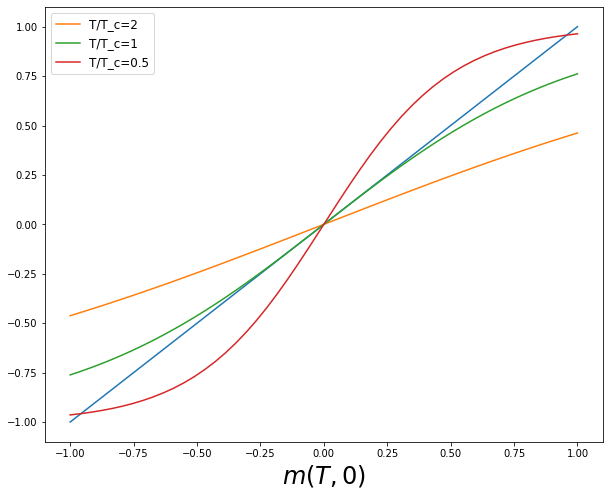

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

m = np.linspace(-1, 1)
ax.plot(m, m)

B = 0
for s in [2, 1, 0.5]:
    T = s*Tc
    beta = 1/(kB*T)
    ax.plot(m, np.tanh(beta * (J*q*m + B)), label=r'T/T_c={}'.format(s))
    
ax.legend(fontsize=12)
ax.set_xlabel(r'$m(T, 0)$', fontsize=24)

## Solving self-consistent equation numerically

0.9575040240772764
-0.9575040240772764
0.0


Text(0.5, 0, '$m(T, 0)$')

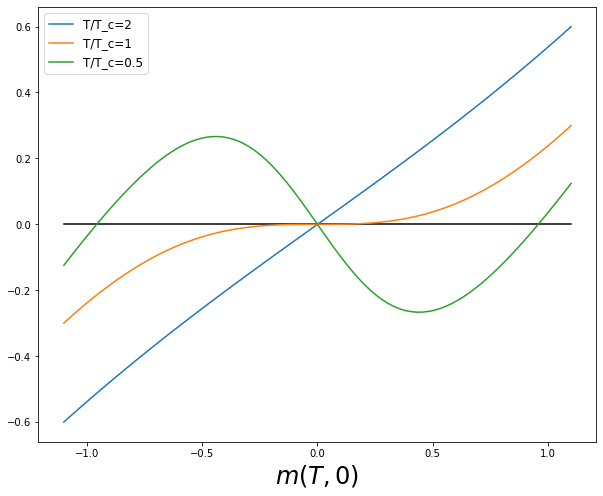

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

m = np.linspace(-1.1, 1.1, 100)
ax.plot(m, np.zeros_like(m),'k')


B = 0
for s in [2, 1, 0.5]:
    T = s*Tc
    beta = 1/(kB*T)
    ax.plot(m, Eq(m, T, B, q), label=r'T/T_c={}'.format(s))
    
print(scipy.optimize.newton(Eq, +1.0, args=(T, B, q)))
print(scipy.optimize.newton(Eq, -1.0, args=(T, B, q)))
print(scipy.optimize.newton(Eq, 0.0, args=(T, B, q)))

ax.legend(fontsize=12)
ax.set_xlabel(r'$m(T, 0)$', fontsize=24)

## Magnetization per spin in zero external field

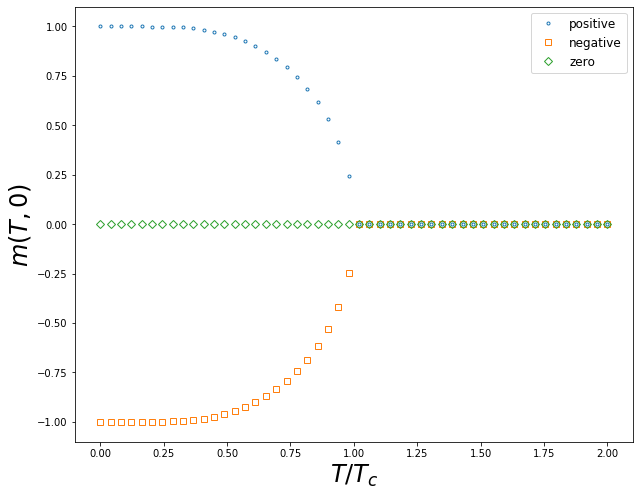

In [7]:
B = 0.0
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.0001, 2*Tc)
m_p = np.empty_like(T)
m_0 = np.empty_like(T)
m_m = np.empty_like(T)

for i, Ti in enumerate(T):
    m_p[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
    m_m[i] = scipy.optimize.newton(Eq, -1.0, args=(Ti, B, q))
    m_0[i] = scipy.optimize.newton(Eq, 0.0, args=(Ti, B, q))

ax.plot(T/Tc, m_p,'.',fillstyle='none',label='positive')
ax.plot(T/Tc, m_m,'s',fillstyle='none',label='negative')
ax.plot(T/Tc, m_0,'D',fillstyle='none',label='zero')

ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$m(T,0)$', fontsize=24)
ax.legend(fontsize=12)

/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


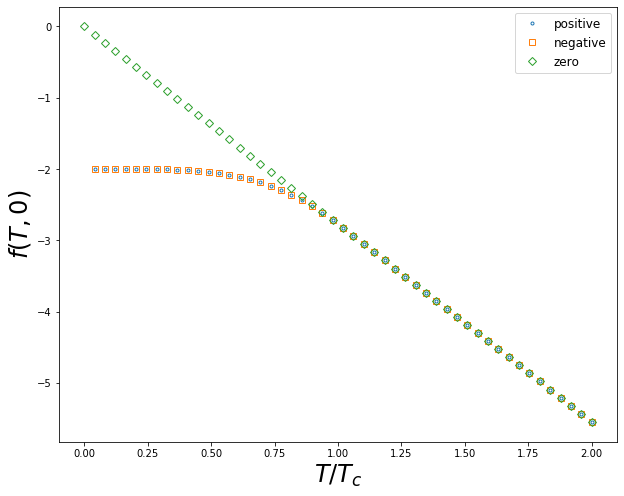

In [8]:
B = 0.0
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.0001, 2*Tc)
m_p = np.empty_like(T)
m_0 = np.empty_like(T)
m_m = np.empty_like(T)

for i, Ti in enumerate(T):
    m_p[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
    m_m[i] = scipy.optimize.newton(Eq, -1.0, args=(Ti, B, q))
    m_0[i] = scipy.optimize.newton(Eq, 0.0, args=(Ti, B, q))

ax.plot(T/Tc, f(m_p,T,B,q),'.',fillstyle='none',label='positive')
ax.plot(T/Tc, f(m_m,T,B,q),'s',fillstyle='none',label='negative')
ax.plot(T/Tc, f(m_0,T,B,q),'D',fillstyle='none',label='zero')

ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$f(T,0)$', fontsize=24)
ax.legend(fontsize=12)

/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
No handles with labels found to put in legend.


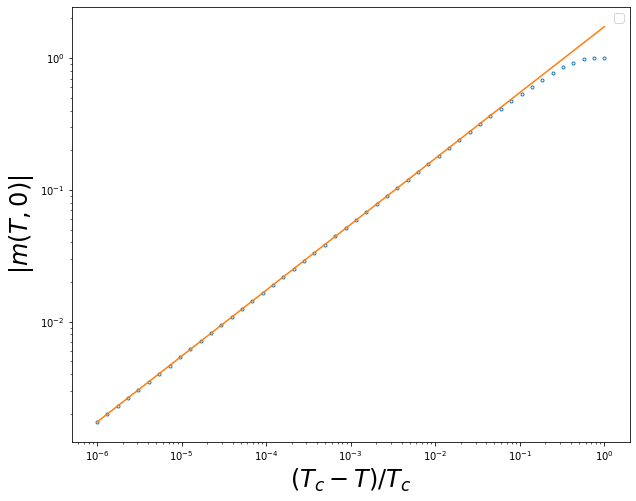

In [9]:
B = 0.0
fig, ax = plt.subplots(figsize=(10,8))

t = np.logspace(-6, 0)
T = Tc*(1-t)
m = np.empty_like(T)

for i, Ti in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
ax.plot(t, m,'.',fillstyle='none')
ax.plot(t, m[0]*(t/t[0])**0.5)

ax.loglog()
ax.set_xlabel(r'$(T_c-T)/T_c$', fontsize=24)
ax.set_ylabel(r'$|m(T,0)|$', fontsize=24)
ax.legend(fontsize=12)

No handles with labels found to put in legend.


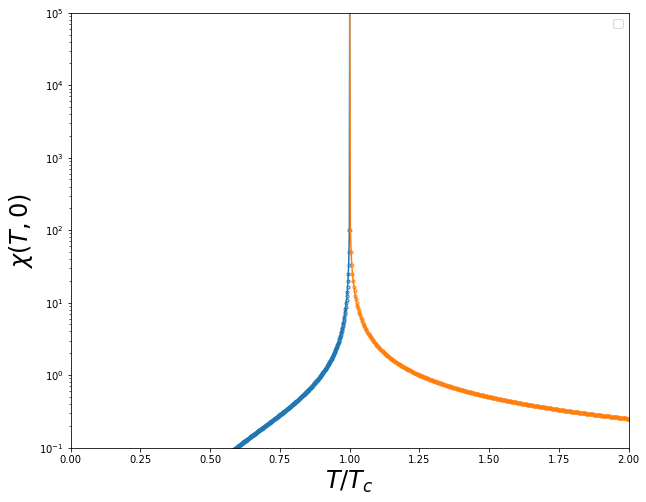

In [10]:
B = 0.0
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.5*Tc, 0.999999*Tc, 400)
m = np.empty_like(T)
for i, Ti in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
ax.plot(T/Tc, chi(m,T,q),'.-',fillstyle='none')

T = np.linspace((1.000001)*Tc, 2*Tc, 400)
m = np.empty_like(T)
for i, Ti in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
ax.plot(T/Tc, chi(m,T,q),'.-',fillstyle='none')

ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$\chi(T,0)$', fontsize=24)
ax.set_xlim([0,2])
ax.set_ylim([10**(-1),10**5])
ax.semilogy()
ax.legend(fontsize=12)

/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


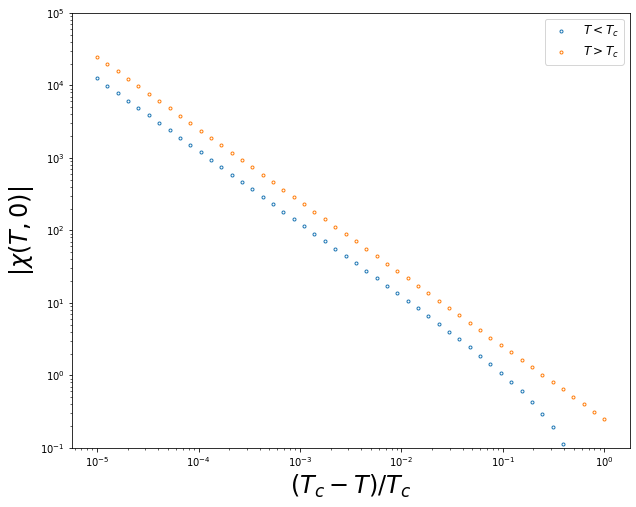

In [11]:
B = 0.0
fig, ax = plt.subplots(figsize=(10,8))

# T<Tc
t = np.logspace(-5, 0)
T = Tc*(1-t)
m = np.empty_like(T)
for i, Ti in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
ax.plot(t, chi(m,T,q), '.',fillstyle='none',label=r'$T<T_c$')
# ax.plot(t, m[0]*(t/t[0])**0.5)

# T>Tc
t = np.logspace(-5, 0)
T = Tc*(1+t)
m = np.empty_like(T)
for i, Ti in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
ax.plot(t, chi(m,T,q), '.',fillstyle='none',label=r'$T>T_c$')
# ax.plot(t, m[0]*(t/t[0])**0.5)

ax.loglog()
ax.set_ylim(10**(-1), 10**5)
ax.set_xlabel(r'$(T_c-T)/T_c$', fontsize=24)
ax.set_ylabel(r'$|\chi(T,0)|$', fontsize=24)
ax.legend(fontsize=12)

## Non-zero external field

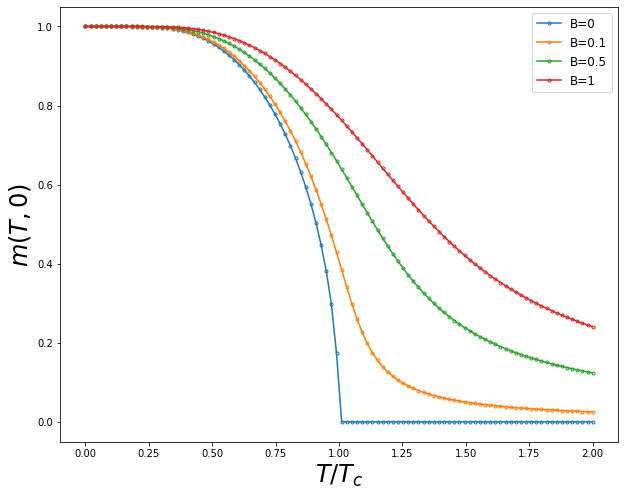

In [12]:
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.0001, 2*Tc, 100)

for B in [0, 0.1, 0.5, 1]:
    m_p = np.empty_like(T)
    m_0 = np.empty_like(T)
    m_m = np.empty_like(T)

    for i, Ti in enumerate(T):
        m_p[i] = scipy.optimize.newton(Eq, +1.0, args=(Ti, B, q))
    #     m_m[i] = scipy.optimize.newton(Eq, -1.0, args=(Ti, B, q))
    #     m_0[i] = scipy.optimize.newton(Eq, 0.0, args=(Ti, B, q))

    ax.plot(T/Tc, m_p,'.-',fillstyle='none',label=r'B={}'.format(B))
    # ax.plot(T/Tc, m_m,'s',fillstyle='none',label='negative')
    # ax.plot(T/Tc, m_0,'D',fillstyle='none',label='zero')

ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$m(T,0)$', fontsize=24)
ax.legend(fontsize=12)

Text(0.5, 0, '$m(T, 0)$')

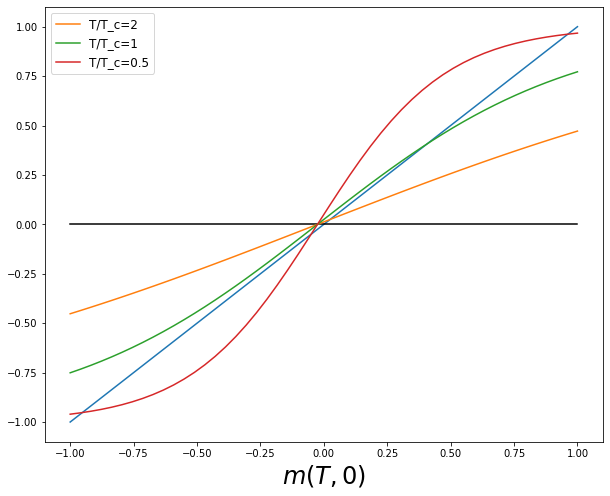

In [13]:
fig, ax = plt.subplots(figsize=(10,8))

m = np.linspace(-1, 1)
ax.plot(m, m)
ax.plot(m, np.zeros_like(m),'k')

B = 0.1
for s in [2, 1, 0.5]:
    T = s*Tc
    beta = 1/(kB*T)
    ax.plot(m, np.tanh(beta * (J*q*m + B)), label=r'T/T_c={}'.format(s))
    
ax.legend(fontsize=12)
ax.set_xlabel(r'$m(T, 0)$', fontsize=24)

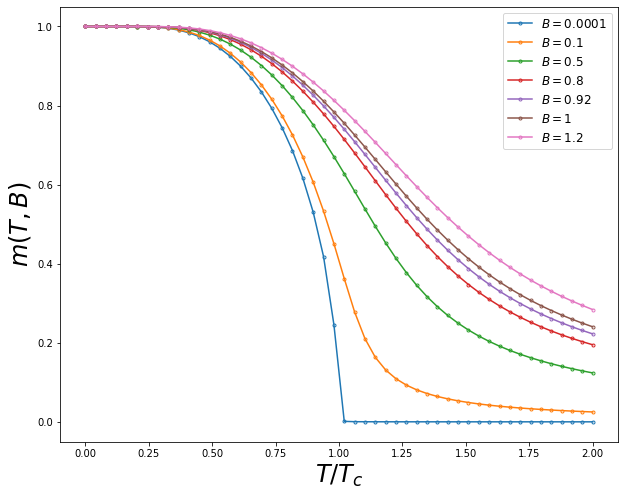

In [14]:
fig, ax = plt.subplots(figsize=(10,8))

for B in [0.0001, 0.1, 0.5, 0.8, 0.92, 1, 1.2]:
    T = np.linspace(0.0001, 2*Tc)
    m = np.empty_like(T)

    for i, t in enumerate(T):
        m[i] = scipy.optimize.newton(Eq, np.sign(B), args=(t, B, q))
    ax.plot(T/Tc, m,'.-',fillstyle='none',label=r'$B={}$'.format(B))

ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$m(T,B)$', fontsize=24)
ax.legend(fontsize=12)

/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in cosh
  This is separate from the ipykernel package so we can avoid doing imports until


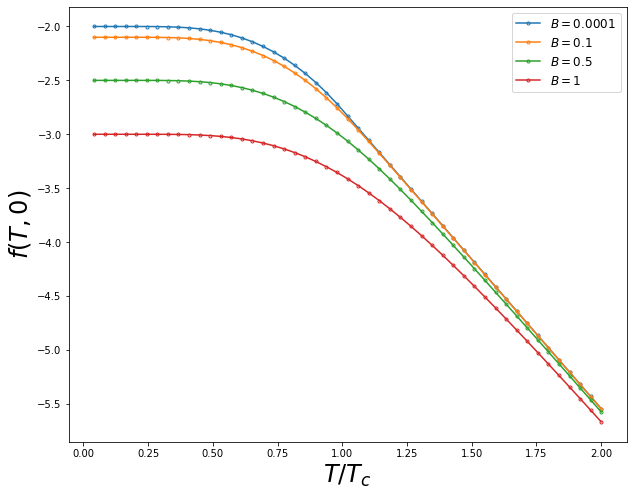

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

for B in [0.0001, 0.1, 0.5, 1]:
    T = np.linspace(0.0001, 2*Tc)
    m = np.empty_like(T)

    for i, t in enumerate(T):
        m[i] = scipy.optimize.newton(Eq, 1, args=(t, B, q))
    ax.plot(T/Tc, f(m,T,B,q),'.-',fillstyle='none',label=r'$B={}$'.format(B))

ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$f(T,0)$', fontsize=24)
ax.legend(fontsize=12)

Text(0, 0.5, '$|m(T,0)|$')

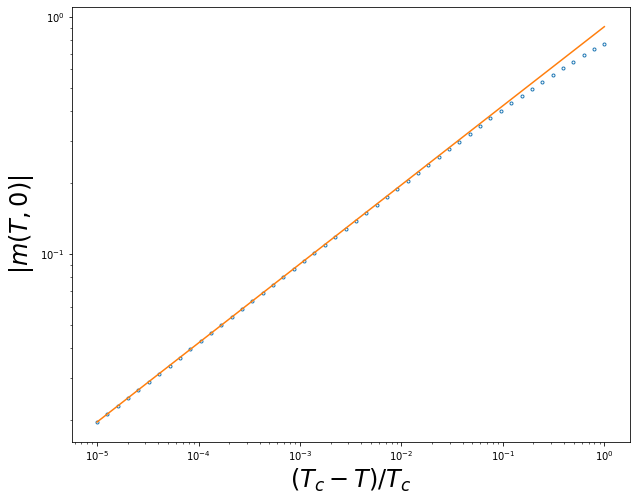

In [16]:
T = Tc
fig, ax = plt.subplots(figsize=(10,8))

B = np.logspace(-5, 0)
m = scipy.optimize.newton(Eq, np.sign(B), args=(T, B, q))
ax.plot(B, m,'.',fillstyle='none')
ax.plot(B, m[0]*(B/B[0])**(1/3))

ax.loglog()
ax.set_xlabel(r'$(T_c-T)/T_c$', fontsize=24)
ax.set_ylabel(r'$|m(T,0)|$', fontsize=24)
# ax.legend(fontsize=12)

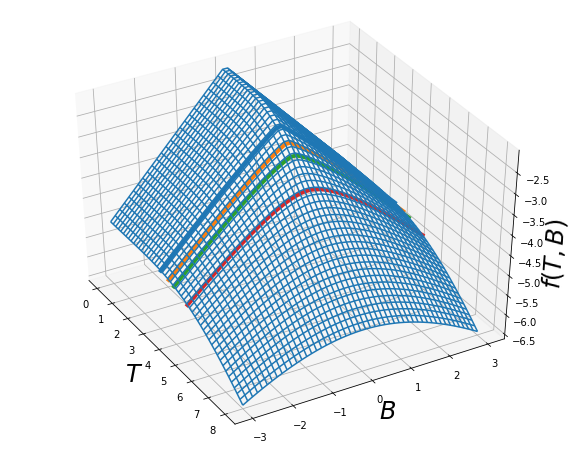

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d',azim=-30, elev=30)

B = np.linspace(-3, 3)
for s in [0.8, 0.92, 1, 1.2]:
    T = s*Tc*np.ones_like(B)
    m = scipy.optimize.newton(Eq, np.sign(B), args=(T, B, q))
    ax.plot(T, B, f(m, T, B, q), linewidth=4, label=r'T={}'.format(t))

T = np.linspace(0.01*Tc, 2*Tc)
B = np.linspace(-3, 3)
T, B = np.meshgrid(T, B)
m = scipy.optimize.newton(Eq, np.sign(B), args=(T, B, q))
# ax.plot_surface(T, B, f(m, T, B, q))
ax.plot_wireframe(T, B, f(m, T, B, q))

ax.set_xlabel(r'$T$', fontsize=24)
ax.set_ylabel(r'$B$', fontsize=24)
ax.set_zlabel(r'$f(T,B)$', fontsize=24)

ax.view_init(elev=40., azim=-30)

/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in tanh
  This is separate from the ipykernel package so we can avoid doing imports until


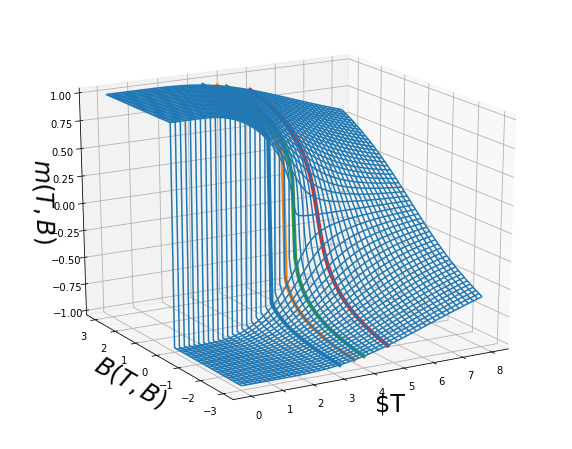

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d',azim=-30, elev=30)

B = np.linspace(-3, 3)
for s in [0.8, 0.92, 1, 1.2]:
    T = s*Tc*np.ones_like(B)
    m = scipy.optimize.newton(Eq, np.sign(B), args=(T, B, q))
    ax.plot(T, B, m, linewidth=4, label=r'T={}'.format(t))

T = np.linspace(0.0*Tc, 2*Tc, 800)
B = np.linspace(-3, 3, 800)
T, B = np.meshgrid(T, B)
m = scipy.optimize.newton(Eq, np.sign(B), args=(T, B, q))
# ax.plot_surface(T, B, m)
ax.plot_wireframe(T, B, m)

ax.set_xlabel(r'$T', fontsize=24)
ax.set_ylabel(r'$B(T,B)$', fontsize=24)
ax.set_zlabel(r'$m(T,B)$', fontsize=24)

ax.view_init(elev=20., azim=-120)

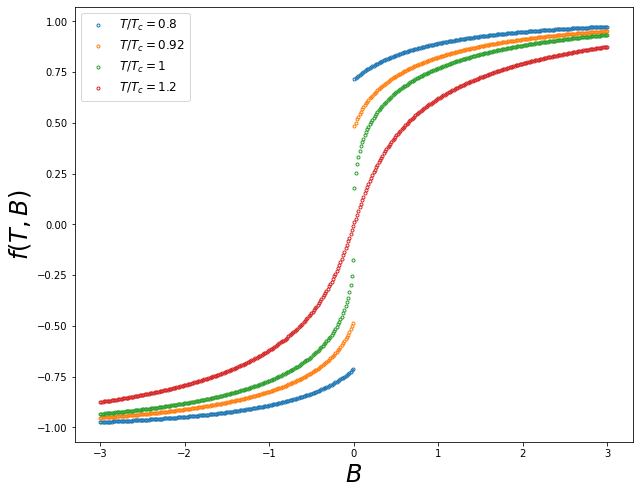

In [19]:
fig, ax = plt.subplots(figsize=(10,8))

for s in [0.8, 0.92, 1, 1.2]:
    T = s*Tc
    B = np.linspace(-3, 3, 400)
    m = np.empty_like(B)
    m = scipy.optimize.newton(Eq, np.sign(B), args=(T, B, q))
    ax.plot(B, m,'.',fillstyle='none', label=r'$T/T_c={}$'.format(s))

ax.set_xlabel(r'$B$', fontsize=24)
ax.set_ylabel(r'$f(T,B)$', fontsize=24)
ax.legend(fontsize=12)

Text(0, 0.5, '$\\chi(T,0)$')

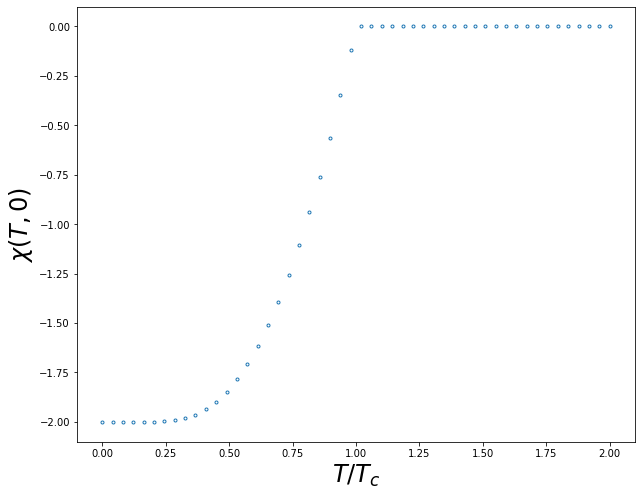

In [20]:
B = 0.0
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.0001*Tc, 2*Tc)
m = np.empty_like(T)
for i, t in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(t, B, q))
ax.plot(T/Tc, epsilon(m,T,q),'.',fillstyle='none')


ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$\chi(T,0)$', fontsize=24)
# ax.legend(fontsize=12)

/Users/pcchen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in cosh
  
No handles with labels found to put in legend.


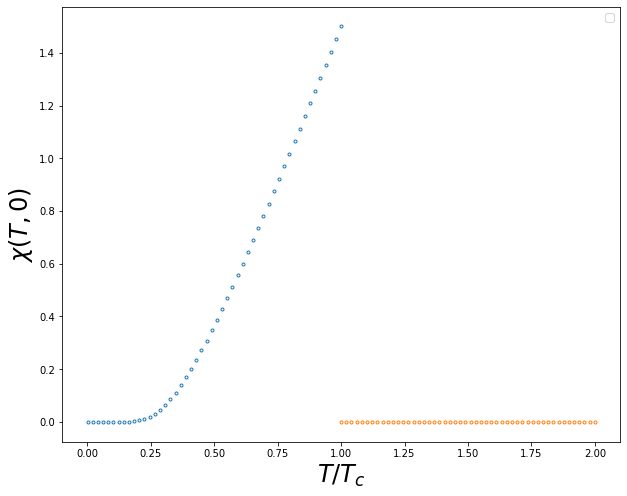

In [21]:
B = 0.0
fig, ax = plt.subplots(figsize=(10,8))

T = np.linspace(0.001*Tc, 0.999999*Tc)
m = np.empty_like(T)
for i, t in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(t, B, q))
ax.plot(T/Tc, c(m,T,q),'.',fillstyle='none')

T = np.linspace((1.000001)*Tc, 2*Tc)
m = np.empty_like(T)
for i, t in enumerate(T):
    m[i] = scipy.optimize.newton(Eq, +1.0, args=(t, B, q))
ax.plot(T/Tc, c(m,T,q),'.',fillstyle='none')

ax.set_xlabel(r'$T/T_c$', fontsize=24)
ax.set_ylabel(r'$\chi(T,0)$', fontsize=24)
ax.legend(fontsize=12)